# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [10]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0,0,1,1]]).T
#y = np.array([[0],[1],[1],[0]])

print(X)
print(y)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[0]
 [0]
 [1]
 [1]]


In [12]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
print(syn0)

iter = 0

#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

# syn0 第一層權值
# syn1 第二層權值
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [15]:
syn0_history = [syn0]
syn1_history = [syn1]

for j in range(50000):
    
    # forward propagation
    
    # Feed forward through layers 0, 1, and 2
    # l0 網路第 1 層，即網路輸入層。
    # l1 網路第 2 層，常稱作隱藏層。
    # l2 假定為網路最後一層，隨著訓練進行，其輸出應該逐漸接近正確結果
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
 
    # how much did we miss the target value?
    # l2_error 該值說明了神經網路預測時“丟失”的數目。
    # l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    # l1_error 該值為 l2_delta 經 syn1 加權後的結果，從而能夠計算得到中間層/隱層的誤差。
    # l1_delta 該值為經確信度加權後的神經網路 l1 層的誤差，除了確信誤差很小時，它近似等於 l1_error 。
    
    
    l2_error = y - l2
 
    if (j% 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))
 
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)
 
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    if (j% 10000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l2_error))))
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
 
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)

L2_Error:0.004800053999346986
L1_Error:0.004800053999346986
L2_Error:0.0033138210781859926
L1_Error:0.0033138210781859926
L2_Error:0.0026739540645139325
L1_Error:0.0026739540645139325
L2_Error:0.002298206076166531
L1_Error:0.002298206076166531
L2_Error:0.0020443235539371763
L1_Error:0.0020443235539371763


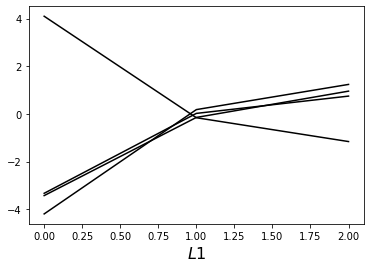

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

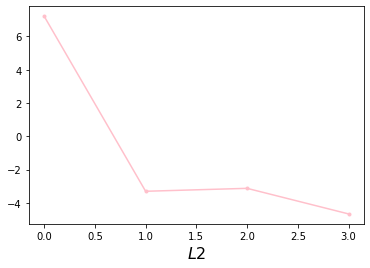

In [17]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='pink')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

In [18]:
print("Output After Training (根據 L1):")
print(l1)

Output After Training (根據 L1):
[[0.23848444 0.67847704 0.72210005 0.77504728]
 [0.21051403 0.683005   0.69135597 0.80488487]
 [0.94967603 0.07003358 0.07766938 0.04921658]
 [0.94141008 0.07140272 0.06768041 0.05836068]]


In [19]:
print("Output After Training (根據 L2):")
print(l2)

Output After Training (根據 L2):
[[0.00168979]
 [0.00130386]
 [0.99786384]
 [0.99769661]]
